### Importing libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import itertools
import plotly.express as px

### Loading data from excel

In [2]:
df = pd.concat([
    pd.read_excel('C:\\KIIT\\5th Semester\\Internship\\Data Scientist\\Week-1\\online_retail_II.xlsx', sheet_name = 'Year 2009-2010'),
    pd.read_excel('C:\\KIIT\\5th Semester\\Internship\\Data Scientist\\Week-1\\online_retail_II.xlsx', sheet_name = 'Year 2010-2011')
],ignore_index = True)

In [3]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


### EDA and Data Cleaning

In [5]:
countries = df['Country'].value_counts()
plot = px.bar(x = countries.index, y = countries.values, title = 'Customer Base in different countries', labels = {'x' : 'Country', 'y' : 'Count'})
plot.show()

In [6]:
df.duplicated().sum()

34335

In [7]:
df = df.drop_duplicates(keep = 'first')

In [8]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4275
Quantity            0
InvoiceDate         0
Price               0
Customer ID    235151
Country             0
dtype: int64

In [9]:
df.dropna(subset = 'Customer ID', axis = 0, inplace = True)

C:\Users\aroy2\AppData\Local\Temp\ipykernel_18156\1003713441.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [10]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


### Calculating total price of each customer

In [11]:
df['Total Price'] = df['Quantity'] * df['Price']
df.head()

C:\Users\aroy2\AppData\Local\Temp\ipykernel_18156\2499801196.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Price
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 797885 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      797885 non-null  object        
 1   StockCode    797885 non-null  object        
 2   Description  797885 non-null  object        
 3   Quantity     797885 non-null  int64         
 4   InvoiceDate  797885 non-null  datetime64[ns]
 5   Price        797885 non-null  float64       
 6   Customer ID  797885 non-null  float64       
 7   Country      797885 non-null  object        
 8   Total Price  797885 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 60.9+ MB


In [15]:
last_date = df.InvoiceDate.max() + dt.timedelta(days = 1)
print(last_date)

2011-12-10 12:50:00


### Recording Recency, Frequency and Monetary factors for each customer

In [80]:
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate' : lambda x : (last_date - x.max()).days,
    'Invoice' : lambda x : x.nunique(),
    'Total Price' : lambda x : x.sum()
})

In [81]:
rfm

,InvoiceDate,Invoice,Total Price
Customer ID,,,
12346.0,326,17,-51.74
12347.0,2,8,4921.53
12348.0,75,5,2019.40
12349.0,19,5,4404.54
12350.0,310,1,334.40
...,...,...,...
18283.0,4,22,2664.90
18284.0,430,2,436.68
18285.0,661,1,427.00


In [82]:
rfm.rename(columns = {'InvoiceDate' : 'Recency', 'Invoice' : 'Frequency', 'Total Price' : 'Monetary'}, inplace = True)

In [83]:
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,326,17,-51.74
12347.0,2,8,4921.53
12348.0,75,5,2019.40
12349.0,19,5,4404.54
12350.0,310,1,334.40


### Recording canceled transaction of each customer

In [84]:
df = df.dropna(subset=['Invoice'])
df['Invoice'] = df['Invoice'].astype(str)
df_canceled = df[df['Invoice'].str.startswith('C')]
canceled_transactions = df_canceled.groupby('Customer ID')['Invoice'].count()
canceled_transactions = canceled_transactions.to_frame()
canceled_transactions = canceled_transactions.rename(columns={'Invoice' : 'Canceled Transactions'})
rfm = pd.merge(rfm, canceled_transactions, on = 'Customer ID', how = 'outer')
rfm.head()

,Recency,Frequency,Monetary,Canceled Transactions
Customer ID,,,,
12346.0,326,17,-51.74,13.0
12347.0,2,8,4921.53,NaN
12348.0,75,5,2019.40,NaN
12349.0,19,5,4404.54,5.0
12350.0,310,1,334.40,NaN


In [85]:
rfm['Canceled Transactions'].fillna(0, inplace = True)
rfm

C:\Users\aroy2\AppData\Local\Temp\ipykernel_18156\1507253057.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,Recency,Frequency,Monetary,Canceled Transactions
Customer ID,,,,
12346.0,326,17,-51.74,13.0
12347.0,2,8,4921.53,0.0
12348.0,75,5,2019.40,0.0
12349.0,19,5,4404.54,5.0
12350.0,310,1,334.40,0.0
...,...,...,...,...
18283.0,4,22,2664.90,0.0
18284.0,430,2,436.68,1.0
18285.0,661,1,427.00,0.0


### Finding optimal number of clusters

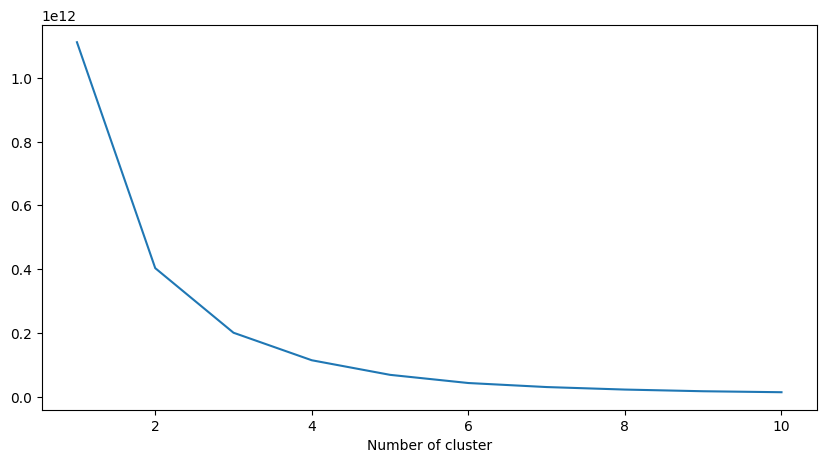

In [86]:
from sklearn.cluster import KMeans

sum_of_squared_errors = {}

recency = rfm[['Recency', 'Frequency', 'Monetary']]

for k in range (1, 11) :
    kmeans = KMeans(n_clusters = k, max_iter = 1000).fit(recency)
    recency['Cluster'] = kmeans.labels_
    sum_of_squared_errors[k] = kmeans.inertia_
plt.figure(figsize = (10,5))
plt.plot(list(sum_of_squared_errors.keys()), list(sum_of_squared_errors.values()))
plt.xlabel("Number of cluster")
plt.show()

In [87]:
kmeans = KMeans(n_clusters = 4, max_iter = 100)
kmeans.fit(rfm)

KMeans(max_iter=100, n_clusters=4)

In [88]:
rfm['Assigned Cluster'] = kmeans.labels_
rfm

,Recency,Frequency,Monetary,Canceled Transactions,Assigned Cluster
Customer ID,,,,,
12346.0,326,17,-51.74,13.0,0
12347.0,2,8,4921.53,0.0,0
12348.0,75,5,2019.40,0.0,0
12349.0,19,5,4404.54,5.0,0
12350.0,310,1,334.40,0.0,0
...,...,...,...,...,...
18283.0,4,22,2664.90,0.0,0
18284.0,430,2,436.68,1.0,0
18285.0,661,1,427.00,0.0,0


In [89]:
kmeans.cluster_centers_

array([[2.04115743e+02, 6.76936113e+00, 1.99116452e+03, 2.66683613e+00],
       [1.50000000e+00, 1.58500000e+02, 5.46861340e+05, 2.30000000e+01],
       [3.43235294e+01, 1.05617647e+02, 6.74906589e+04, 5.58235294e+01],
       [5.20000000e+00, 2.04400000e+02, 2.30344872e+05, 1.41800000e+02]])

### Silhouette Score

In [90]:
from sklearn.metrics import silhouette_score
print("Silhouette score : ",silhouette_score(rfm, kmeans.labels_, metric = 'euclidean'))

Silhouette score :  0.952250454942574


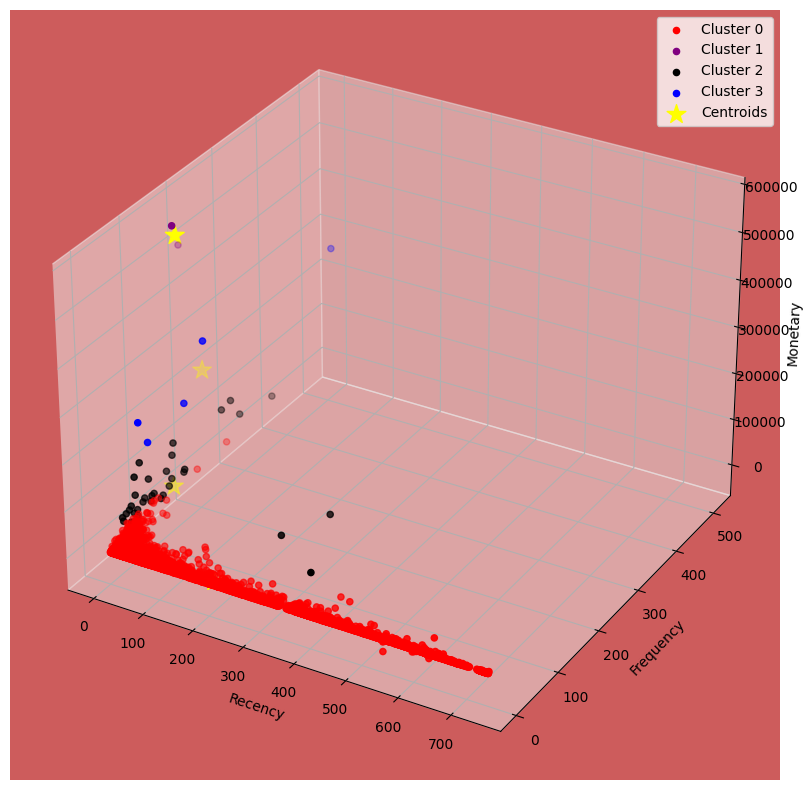

In [91]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# Assuming kmeans is already fitted and RFMT is the DataFrame containing your data

# Segment the data by clusters
one = rfm[rfm["Assigned Cluster"] == 0]
two = rfm[rfm["Assigned Cluster"] == 1]
three = rfm[rfm["Assigned Cluster"] == 2]
four = rfm[rfm["Assigned Cluster"] == 3]

# Set up the 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor("#cd5c5c")

# Plot the clusters
ax.scatter(one["Recency"], one["Frequency"], one["Monetary"], color='red', label='Cluster 0')
ax.scatter(two["Recency"], two["Frequency"], two["Monetary"], color='purple', label='Cluster 1')
ax.scatter(three["Recency"], three["Frequency"], three["Monetary"], color='black', label='Cluster 2')
ax.scatter(four["Recency"], four["Frequency"], four["Monetary"], color='blue', label='Cluster 3')

# Plot the cluster centers
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], color="yellow", marker="*", s=200, label="Centroids")

# Set labels for axes
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

# Add legend
ax.legend()

# Show the plot
plt.show()


In [92]:
rfm

,Recency,Frequency,Monetary,Canceled Transactions,Assigned Cluster
Customer ID,,,,,
12346.0,326,17,-51.74,13.0,0
12347.0,2,8,4921.53,0.0,0
12348.0,75,5,2019.40,0.0,0
12349.0,19,5,4404.54,5.0,0
12350.0,310,1,334.40,0.0,0
...,...,...,...,...,...
18283.0,4,22,2664.90,0.0,0
18284.0,430,2,436.68,1.0,0
18285.0,661,1,427.00,0.0,0


In [93]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Price
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85


### Finding last 6 months revenue

In [94]:
print(df.InvoiceDate.min())
print(df.InvoiceDate.max())

2009-12-01 07:45:00
2011-12-09 12:50:00


In [102]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
start_date = dt.datetime(2011, 6, 1)
end_date = dt.datetime(2011, 12, 1)
last_6_months_revenue = df[(df['InvoiceDate'] >= start_date) & (df['InvoiceDate'] < end_date)].reset_index(drop = True)

In [103]:
last_6_months_revenue

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Price
0,555156,23299,FOOD COVER WITH BEADS SET 2,6,2011-06-01 07:37:00,3.75,15643.0,United Kingdom,22.50
1,555156,22847,BREAD BIN DINER STYLE IVORY,1,2011-06-01 07:37:00,16.95,15643.0,United Kingdom,16.95
2,555157,23075,PARLOUR CERAMIC WALL HOOK,16,2011-06-01 07:38:00,4.15,15643.0,United Kingdom,66.40
3,555157,47590B,PINK HAPPY BIRTHDAY BUNTING,6,2011-06-01 07:38:00,5.45,15643.0,United Kingdom,32.70
4,555157,22423,REGENCY CAKESTAND 3 TIER,4,2011-06-01 07:38:00,12.75,15643.0,United Kingdom,51.00
...,...,...,...,...,...,...,...,...,...
236890,C579886,22197,POPCORN HOLDER,-1,2011-11-30 17:39:00,0.85,15676.0,United Kingdom,-0.85
236891,C579886,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,-1,2011-11-30 17:39:00,3.29,15676.0,United Kingdom,-3.29
236892,C579887,84946,ANTIQUE SILVER T-LIGHT GLASS,-1,2011-11-30 17:42:00,1.25,16717.0,United Kingdom,-1.25
236893,C579887,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2011-11-30 17:42:00,7.95,16717.0,United Kingdom,-7.95


In [104]:
last_6_months_revenue = last_6_months_revenue.groupby('Customer ID')['Total Price'].sum().reset_index()
last_6_months_revenue.rename(columns = {'Total Price' : 'Last 6 Months Revenue'}, inplace = True)
last_6_months_revenue.head()

,Customer ID,Last 6 Months Revenue
0,12347.0,2261.75
1,12348.0,310.00
2,12349.0,1757.55
3,12352.0,944.23
4,12356.0,58.35


c:\Users\aroy2\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



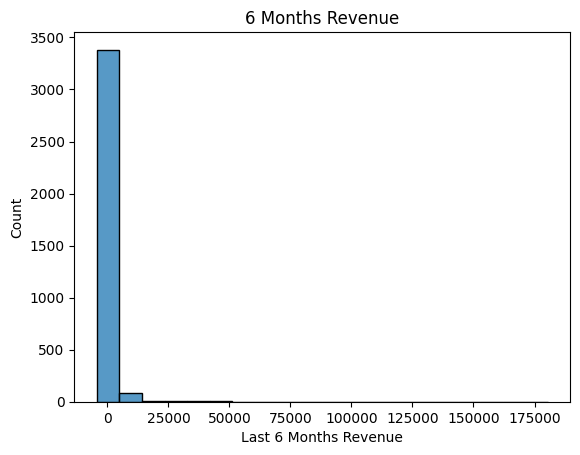

In [143]:
sns.histplot(data = last_6_months_revenue, x = 'Last 6 Months Revenue', bins = 20)
plt.title('6 Months Revenue')
plt.show()

In [106]:
last_6_months_revenue

,Customer ID,Last 6 Months Revenue
0,12347.0,2261.75
1,12348.0,310.00
2,12349.0,1757.55
3,12352.0,944.23
4,12356.0,58.35
...,...,...
3494,18278.0,173.90
3495,18281.0,80.82
3496,18282.0,98.76
3497,18283.0,1322.01


In [107]:
rfm = pd.merge(rfm, last_6_months_revenue, on = 'Customer ID', how = 'left')
rfm.fillna(0, inplace = True)
rfm.head()

,Customer ID,Recency,Frequency,Monetary,Canceled Transactions,Assigned Cluster,Last 6 Months Revenue
0,12346.0,326,17,-51.74,13.0,0,0.00
1,12347.0,2,8,4921.53,0.0,0,2261.75
2,12348.0,75,5,2019.40,0.0,0,310.00
3,12349.0,19,5,4404.54,5.0,0,1757.55
4,12350.0,310,1,334.40,0.0,0,0.00


### Finding last 9 months revenue

In [108]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
start_date = dt.datetime(2011, 3, 1)
end_date = dt.datetime(2011, 12, 1)
last_9_months_revenue = df[(df['InvoiceDate'] >= start_date) & (df['InvoiceDate'] < end_date)].reset_index(drop = True)

In [109]:
last_9_months_revenue

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Price
0,545220,21955,DOORMAT UNION JACK GUNS AND ROSES,2,2011-03-01 08:30:00,7.95,14620.0,United Kingdom,15.90
1,545220,48194,DOORMAT HEARTS,2,2011-03-01 08:30:00,7.95,14620.0,United Kingdom,15.90
2,545220,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-03-01 08:30:00,1.65,14620.0,United Kingdom,19.80
3,545220,22139,RETROSPOT TEA SET CERAMIC 11 PC,3,2011-03-01 08:30:00,4.95,14620.0,United Kingdom,14.85
4,545220,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,4,2011-03-01 08:30:00,3.75,14620.0,United Kingdom,15.00
...,...,...,...,...,...,...,...,...,...
316055,C579886,22197,POPCORN HOLDER,-1,2011-11-30 17:39:00,0.85,15676.0,United Kingdom,-0.85
316056,C579886,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,-1,2011-11-30 17:39:00,3.29,15676.0,United Kingdom,-3.29
316057,C579887,84946,ANTIQUE SILVER T-LIGHT GLASS,-1,2011-11-30 17:42:00,1.25,16717.0,United Kingdom,-1.25
316058,C579887,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2011-11-30 17:42:00,7.95,16717.0,United Kingdom,-7.95


In [111]:
last_9_months_revenue = last_9_months_revenue.groupby('Customer ID')['Total Price'].sum().reset_index()
last_9_months_revenue.rename(columns = {'Total Price' : 'Last 9 Months Revenue'}, inplace = True)
last_9_months_revenue.head()

,Customer ID,Last 9 Months Revenue
0,12347.0,2898.00
1,12348.0,677.00
2,12349.0,1757.55
3,12352.0,1248.91
4,12353.0,89.00


c:\Users\aroy2\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



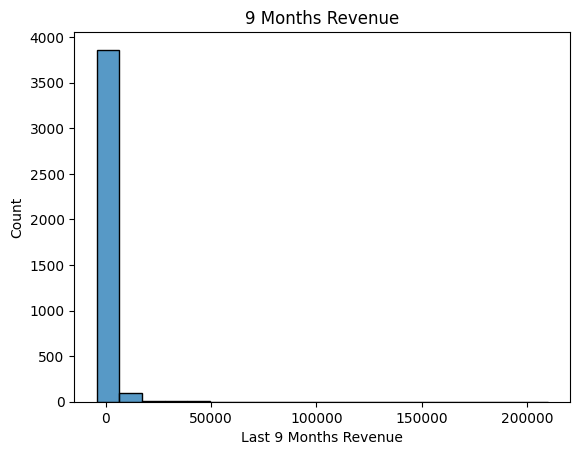

In [113]:
sns.histplot(data = last_9_months_revenue, x = 'Last 9 Months Revenue', bins = 20)
plt.title('9 Months Revenue')
plt.show()

In [116]:
rfm = pd.merge(rfm, last_9_months_revenue, on = 'Customer ID', how = 'left')
rfm.fillna(0, inplace = True)
rfm.head()

,Customer ID,Recency,Frequency,Monetary,Canceled Transactions,Assigned Cluster,Last 6 Months Revenue,Last 9 Months Revenue
0,12346.0,326,17,-51.74,13.0,0,0.00,0.00
1,12347.0,2,8,4921.53,0.0,0,2261.75,2898.00
2,12348.0,75,5,2019.40,0.0,0,310.00,677.00
3,12349.0,19,5,4404.54,5.0,0,1757.55,1757.55
4,12350.0,310,1,334.40,0.0,0,0.00,0.00


In [117]:
rfm

,Customer ID,Recency,Frequency,Monetary,Canceled Transactions,Assigned Cluster,Last 6 Months Revenue,Last 9 Months Revenue
0,12346.0,326,17,-51.74,13.0,0,0.00,0.00
1,12347.0,2,8,4921.53,0.0,0,2261.75,2898.00
2,12348.0,75,5,2019.40,0.0,0,310.00,677.00
3,12349.0,19,5,4404.54,5.0,0,1757.55,1757.55
4,12350.0,310,1,334.40,0.0,0,0.00,0.00
...,...,...,...,...,...,...,...,...
5937,18283.0,4,22,2664.90,0.0,0,1322.01,1522.83
5938,18284.0,430,2,436.68,1.0,0,0.00,0.00
5939,18285.0,661,1,427.00,0.0,0,0.00,0.00
5940,18286.0,477,3,1188.43,3.0,0,0.00,0.00


### Creating Linear Regression Model

In [118]:
corr_matrix = rfm.corr()
corr_matrix['Last 6 Months Revenue'].sort_values(ascending = False)

Last 6 Months Revenue    1.000000
Last 9 Months Revenue    0.992527
Monetary                 0.947451
Assigned Cluster         0.599115
Frequency                0.543630
Canceled Transactions    0.376482
Customer ID             -0.009053
Recency                 -0.152495
Name: Last 6 Months Revenue, dtype: float64

In [119]:
corr_matrix = rfm.corr()
corr_matrix['Last 9 Months Revenue'].sort_values(ascending = False)

Last 9 Months Revenue    1.000000
Last 6 Months Revenue    0.992527
Monetary                 0.953308
Assigned Cluster         0.615522
Frequency                0.564560
Canceled Transactions    0.399388
Customer ID             -0.012355
Recency                 -0.156754
Name: Last 9 Months Revenue, dtype: float64

In [131]:
x = rfm[['Recency', 'Frequency', 'Monetary', 'Assigned Cluster']]
y = rfm['Last 6 Months Revenue']

In [132]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [133]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

### Result of next 6 months revenue

In [134]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred_6_months = lr.predict(x_test)
r2Score = r2_score(y_test, y_pred_6_months)
print(r2Score)

0.9590972228052804


In [135]:
result_6_months = pd.DataFrame({'Last 6 Months Revenue' : y_test, 'Forecasted Next 6 Months Revenue' : y_pred_6_months})
result_6_months

,Last 6 Months Revenue,Forecasted Next 6 Months Revenue
4568,183.76,334.871376
2935,376.84,2318.450763
21,0.00,362.537253
5631,288.14,691.264817
100,1002.31,574.074348
...,...,...
863,3513.02,2555.298526
3925,1250.47,1111.467367
3680,236.09,344.497935
5552,52.22,237.610737


In [138]:
x = rfm[['Recency', 'Frequency', 'Monetary', 'Assigned Cluster']]
y = rfm['Last 9 Months Revenue']

In [139]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

### Result of next 9 months revenue

In [140]:
y_pred_9_months = lr.predict(x_test)
r2Score = r2_score(y_test, y_pred_9_months)
print(r2Score)

0.9012786254421938


In [141]:
result_9_months = pd.DataFrame({'Last 9 Months Revenue' : y_test, 'Forecasted Next 9 Months Revenue' : y_pred_9_months})
result_9_months

,Last 9 Months Revenue,Forecasted Next 9 Months Revenue
1769,0.00,-5.447354
392,0.00,11.239444
1593,384.05,762.694079
796,307.09,539.520075
5422,1279.45,1530.512697
...,...,...
3956,212.82,355.932947
82,7877.20,3201.954663
5343,0.00,25.419301
3267,0.00,-194.920222
